# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 0: Load Important Python Modules

In [1]:
# your code here
import unidecode

# Standard operational package imports.
import pandas as pd
import numpy as np

# Visualization package imports.
import matplotlib
import seaborn as sns

# Others
import calendar as cal
import re
import random

# Important imports for preprocessing, modeling, and evaluation.
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as smvif
import statsmodels.formula.api as smfapi
import statsmodels.api as smapi
import statsmodels.tools.tools as smtools
import statsmodels.stats.multicomp as smmulti
import sklearn.model_selection as sklmodslct
import sklearn.linear_model as skllinmod
import sklearn.metrics as sklmtrcs

In [2]:
# importing all my important data analysis functions
import data_analysis_functions

## Task 1: Load the Data

In [3]:
# load the online-retail dataset xlsx
data = pd.read_excel("online-retail_dataset.xlsx")
data_analysis_functions.df_head(data,10)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

## Task 2: Data Cleaning 

Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.

Also, to makesure datetime columns are actually in datetime and numeric columns are actually numeric and not strings.

In [4]:
# get all data types of the columns
print("number rows and columns before dropna(axis=0)")
data_analysis_functions.df_print_row_and_columns(data)
old_row_numbers = data.shape[0]
print("")

print("data types:")
data_analysis_functions.df_info_dtypes(data)
print("")
#data_analysis_functions.df_info_dtypes(data)

# get summary statistics
print("summary statistics:")
print(data.describe())
print("")

# removing empty rows
data = data.dropna(axis=0).reset_index(drop=True)
print("number rows and columns after dropna(axis=0)")
data_analysis_functions.df_print_row_and_columns(data)
new_row_numbers = data.shape[0]

# % missing data
percentage_nadata = format(1-(new_row_numbers/old_row_numbers),"0.2%")
print("{} missing (null) data".format(percentage_nadata))

# need to further mask using InvoiceNo
returns = data[(data['Quantity'] < 0.0)]
returns_customer_id = returns['CustomerID'].values.tolist()
returns_unit_price = returns['StockCode'].values.tolist()
mask_list = []
columns = data.columns.tolist()
data_returns_calculated = pd.DataFrame(columns=columns)
for i in range(len(returns_customer_id)):
    cust_id = returns_customer_id[i]
    unit_p = returns_unit_price[i]
    mask = (data['CustomerID'] == cust_id) & (data['StockCode'] == unit_p)
    masked = data[mask]
    mask_list += masked.index.tolist()
    sum_quantity = masked['Quantity'].sum()
    average_unit_p = masked['UnitPrice'].mean()
    invoice_code = masked.iloc[0:1,0:1].values[0][0]
    invoice_date = masked.iloc[0:1,4:5].values[0][0]
    country = masked.iloc[0:1,7:8].values[0][0]
    description = masked.iloc[0:1,2:3].values[0][0]
    new_df_list = [invoice_code, unit_p, description, sum_quantity, invoice_date, average_unit_p, cust_id, country]
    data_returns_calculated.loc[i] = new_df_list
mask_list = list(set(mask_list))   
data_returns_filter = data.index.isin(mask_list)
data_purchases_constructor = data[~data_returns_filter]
data_purchases = pd.concat([data_purchases_constructor, data_returns_calculated], ignore_index=True)
data_purchases = data_purchases[data_purchases['Quantity'] >= 0]
print(data_purchases)

# discount only
discounts = data[data['Description'] == 'Discount']


number rows and columns before dropna(axis=0)
rows = 541909
columns = 8

data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

summary statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048      

COMMENT:
All columns are of the expected data type. However there is negative quantity

In [5]:
# get all data only positive quantity and unitprice columns
print("number rows and columns after dropping negatives")
neg_row_numbers = old_row_numbers - data_purchases.shape[0]
percentage_negdata = format((neg_row_numbers/old_row_numbers),"0.2%")
print("{} irrelevant (negative) data".format(percentage_negdata))
print(data_purchases.describe())


number rows and columns after dropping negatives
28.45% irrelevant (negative) data
            Quantity                    InvoiceDate      UnitPrice  \
count  387758.000000                         387758  387758.000000   
mean       13.201938  2011-07-10 10:12:12.433631744       3.035461   
min         0.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-05 15:00:00       1.250000   
50%         5.000000            2011-07-31 12:16:00       1.850000   
75%        12.000000            2011-10-20 14:52:00       3.750000   
max     12540.000000            2011-12-09 12:50:00    8142.750000   
std        62.216133                            NaN      18.052927   

          CustomerID  
count  387758.000000  
mean    15294.693752  
min     12346.000000  
25%     13969.000000  
50%     15159.000000  
75%     16795.000000  
max     18287.000000  
std      1712.365073  


## Task 3: Exploratory Data Analysis

View the descriptive statistics such as mean, mode and median as well as standard deviation, range etc.

In [6]:
# get all exploratory stats about CENTRAL TENDENCY
data_mode = data_purchases[['Quantity','UnitPrice','Country']].agg([pd.Series.mode])
print(data_mode)
data_mean = data_purchases[['Quantity','UnitPrice']].agg([pd.Series.mean])
print(data_mean)
data_median = data_purchases[['Quantity','UnitPrice']].agg([pd.Series.median])
print(data_median)

  Quantity UnitPrice         Country
      mode      mode            mode
0        1      1.25  United Kingdom
       Quantity  UnitPrice
mean  13.201938   3.035461
        Quantity  UnitPrice
median       5.0       1.85


In [7]:
# get all exploratory stats about SPREAD
data_std = data_purchases[['Quantity','UnitPrice']].agg([pd.Series.std])
print(data_std)
data_skew = data_purchases[['Quantity','UnitPrice']].agg([pd.Series.skew])
print(data_skew)
print("")
# data_iqr = data[['Quantity','UnitPrice']].agg([pd.Series.quantile(q=0.25)])\
#           - data[['Quantity','UnitPrice']].agg([pd.Series.quantile(q=0.75)]) 
# print(data_iqr)

      Quantity  UnitPrice
std  62.216133  18.052927
      Quantity   UnitPrice
skew  73.14429  270.587024



Quite high skew in unit price which can be seen by th

## Task 4: Data Visualisation 

To gain insights and to visualise outliers

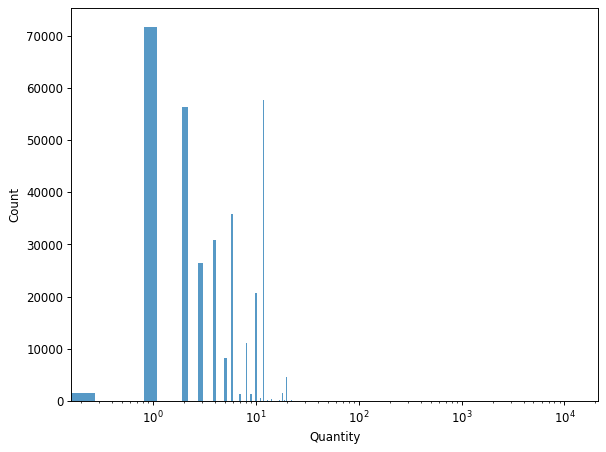

In [8]:
# use histogram
fig = matplotlib.pyplot.subplots(figsize=(8, 6), dpi=85)
sns.histplot(data=data_purchases, x="Quantity")
matplotlib.pyplot.xscale('log')
matplotlib.pyplot.show()

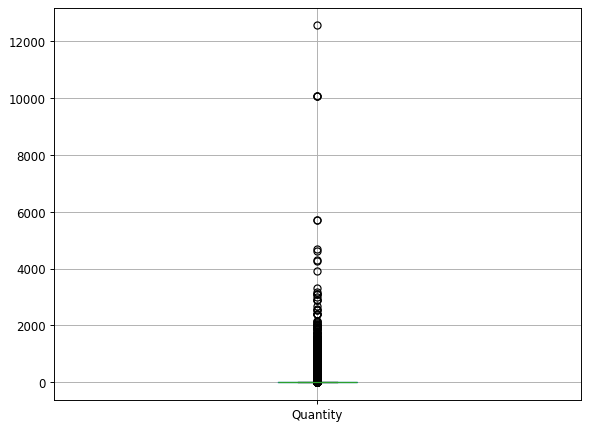

In [9]:
# use boxplot to visualize extreme outliers
fig2 = matplotlib.pyplot.subplots(figsize=(8, 6), dpi=85)
data_purchases.boxplot(column=['Quantity'], return_type='axes')
matplotlib.pyplot.show()

<Figure size 510x510 with 0 Axes>

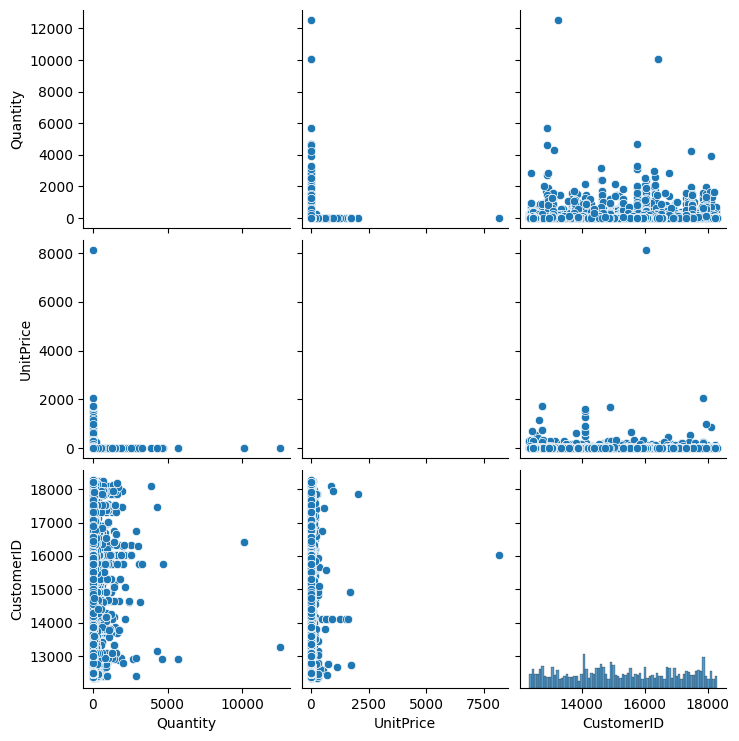

In [10]:
# use matrix scatter plot to visualise data relationships
data_analysis_functions.df_pairplot(data_purchases)

## Task 5: Analyse Trends over Time and also Analyse Busiest Months

We will make another column called "Total Price", then divide the data into years by making a new "Year" column, and then strftime by month (New "Month" column) to visualise what the trends were like over the months
1. Average Sale Quantity per month
2. Average Price per Purchase
3. Price per Invoice
4. Total Sales per month
5. Total Sales of particular product per month

In [11]:
# creating total price column
data_purchases.loc[:,"TotalRevenue"] = data_purchases["Quantity"].multiply(data_purchases["UnitPrice"])
print(data_analysis_functions.df_head(data_purchases, 10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536366     22633               HAND WARMER UNION JACK         6   
7    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
8    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
9    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalRevenue  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United 

In [12]:
# strfint year and month
data_purchases.loc[:,"YearMonth"] = data_purchases.loc[:,"InvoiceDate"].dt.strftime("%Y-M%m")
print(data_analysis_functions.df_head(data_purchases, 10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536366     22633               HAND WARMER UNION JACK         6   
7    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
8    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
9    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalRevenue  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         15.30   
1 2010-12-01 08:26:00       3.39     17850.0  Unite

/home/kb/python-data-engineering/data-analysis-projects/project02_perform-eda-on-retail-data/data_analysis_functions.py:156: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_plot = [index[0] for row, index in df_grouped.iterrows()]
/home/kb/python-data-engineering/data-analysis-projects/project02_perform-eda-on-retail-data/data_analysis_functions.py:164: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title=col_groupby)


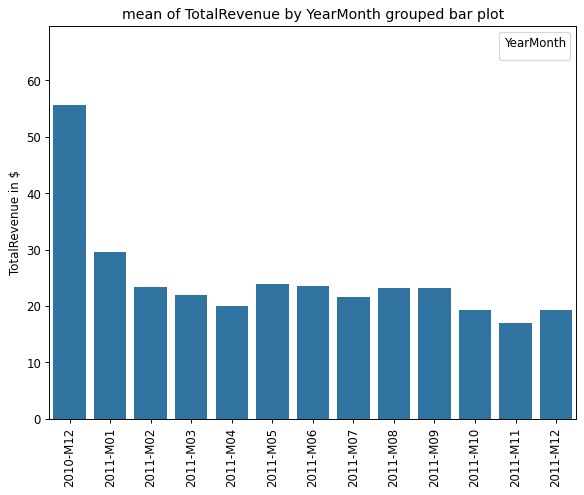

In [13]:
# monthly_revenue = data_analysis_functions.df_groupby_mask_operate(data_purchases, "YearMonth", "TotalRevenue", False, '0', 'mean')
data_analysis_functions.df_grouped_barplotter(data_purchases, "YearMonth", "TotalRevenue", 1, 'mean')

/home/kb/python-data-engineering/data-analysis-projects/project02_perform-eda-on-retail-data/data_analysis_functions.py:156: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_plot = [index[0] for row, index in df_grouped.iterrows()]
/home/kb/python-data-engineering/data-analysis-projects/project02_perform-eda-on-retail-data/data_analysis_functions.py:164: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title=col_groupby)


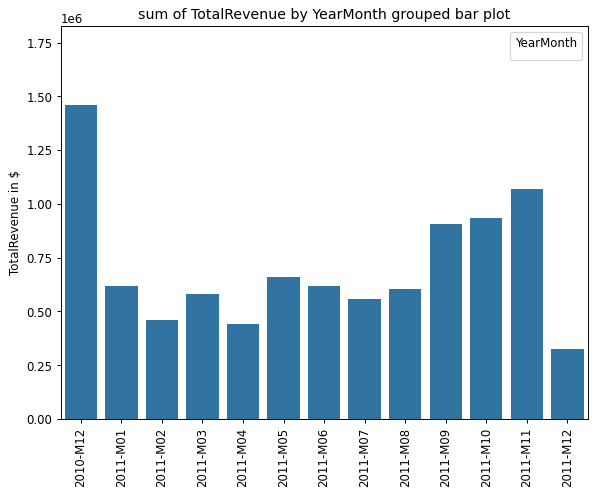

In [14]:
data_analysis_functions.df_grouped_barplotter(data_purchases, "YearMonth", "TotalRevenue", 1, 'sum')

/home/kb/python-data-engineering/data-analysis-projects/project02_perform-eda-on-retail-data/data_analysis_functions.py:156: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_plot = [index[0] for row, index in df_grouped.iterrows()]
/home/kb/python-data-engineering/data-analysis-projects/project02_perform-eda-on-retail-data/data_analysis_functions.py:164: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title=col_groupby)


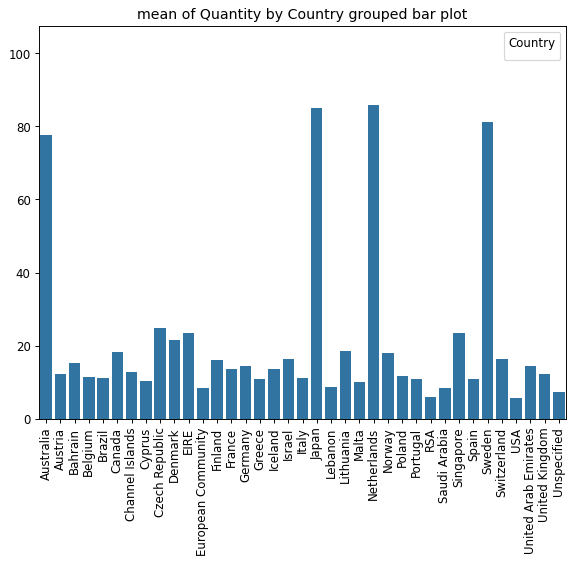

In [15]:
# mean quantity purchased per purchase in countries
data_analysis_functions.df_grouped_barplotter(data_purchases, "Country", "Quantity", 2, 'mean')

/home/kb/python-data-engineering/data-analysis-projects/project02_perform-eda-on-retail-data/data_analysis_functions.py:156: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_plot = [index[0] for row, index in df_grouped.iterrows()]
/home/kb/python-data-engineering/data-analysis-projects/project02_perform-eda-on-retail-data/data_analysis_functions.py:164: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title=col_groupby)


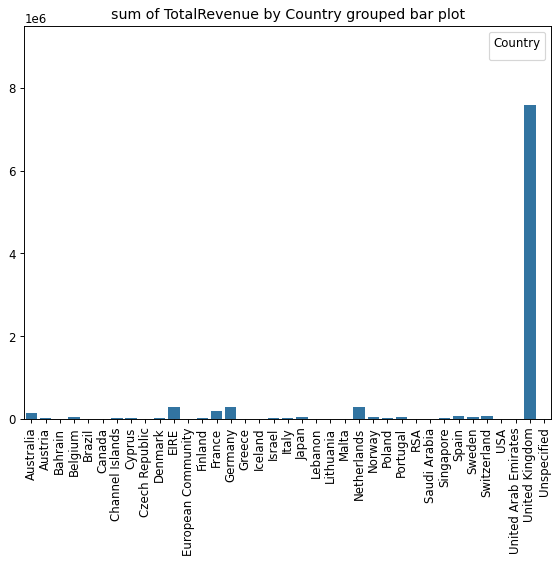

In [16]:
# total quantity purchased per countries
data_analysis_functions.df_grouped_barplotter(data_purchases, "Country", "TotalRevenue", 2, 'sum')

The UK had the most purchases by far, and also was the largest source of revenue even the the average sale price was lower.

## TASK 6: Explore the top-selling products and countries based on the quantity sold.

Here we shall simply groupby and aggreagate and show the products in terms of total revenue 

In [17]:
# total quantity purchased per product
quantity_per_product = data_analysis_functions.df_groupby_mask_operate(data_purchases, "Description", "Quantity", False, "0", "sum")
col = quantity_per_product.columns.tolist()
quantity_per_product.sort_values(by=col, inplace=True, ascending=0)
print("Ten higher selling products are:")
print(data_analysis_functions.df_head(quantity_per_product, 10))

Ten higher selling products are:
                                   Quantity
                                        sum
Description                                
JUMBO BAG RED RETROSPOT               58967
WORLD WAR 2 GLIDERS ASSTD DESIGNS     58927
BROCADE RING PURSE                    43114
SMALL POPCORN HOLDER                  38035
WHITE HANGING HEART T-LIGHT HOLDER    36483
ASSORTED COLOUR BIRD ORNAMENT         35315
PACK OF 72 RETROSPOT CAKE CASES       33555
POPCORN HOLDER                        28312
RABBIT NIGHT LIGHT                    27314
MINI PAINT SET VINTAGE                26057
None


In [18]:
# total revenue purchased per product
revenue_per_product = data_analysis_functions.df_groupby_mask_operate(data_purchases, "Description", "TotalRevenue", False, "0", "sum")
col = revenue_per_product.columns.tolist()
revenue_per_product.sort_values(by=col, inplace=True, ascending=0)
print("Ten higher grossing products are:")
print(data_analysis_functions.df_head(revenue_per_product, 10))

Ten higher grossing products are:
                                     TotalRevenue
                                              sum
Description                                      
BROCADE RING PURSE                  316740.478235
REGENCY CAKESTAND 3 TIER            236902.001134
Manual                              126966.653475
JUMBO BAG RED RETROSPOT             108066.113841
WHITE HANGING HEART T-LIGHT HOLDER  100117.311176
POSTAGE                              71844.391746
PARTY BUNTING                        69990.342727
ASSORTED COLOUR BIRD ORNAMENT        56530.150000
RABBIT NIGHT LIGHT                   51625.241000
CHILLI LIGHTS                        46241.385952
None


## Task 7: Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

In [19]:
# identification of outliers
# method 1, percentile, we we set the outliers at the 90th percentile.
percentile_ninenty = np.percentile(data_purchases['Quantity'], 90)
data_outliers = data_purchases[data_purchases['Quantity'] > percentile_ninenty]
print(data_outliers['Quantity'])
data_purchases.loc[:,'Quantity'] = data_purchases.loc[:,'Quantity'].apply(lambda x: (percentile_ninenty if x > percentile_ninenty else x))
print(data_purchases['Quantity'])

# use boxplot to visualize extreme outliers
#fig3 = matplotlib.pyplot.subplots(figsize=(8, 6), dpi=85)
#data_purchases.boxplot(column=['Quantity'], return_type='axes')
#matplotlib.pyplot.show()

7          32
28         48
41         36
42         80
66         48
         ... 
388828    111
388830    573
388831    349
388833     46
388834    167
Name: Quantity, Length: 30107, dtype: int64
0          6
1          6
2          8
3          6
4          6
          ..
388830    24
388831    24
388833    24
388834    24
388835     1
Name: Quantity, Length: 387758, dtype: int64


Now we see the outliers are removed,

## Task 8: Draw conclusions and summarize your findings from the exploratory data analysis.

1. We clearly see that the United Kingdom has the highest sales volume 

2. We can also see that there are outliers in quantities, but these are mitigated for and removed, the negative quantities and negative unit prices, we see that some of these are discounts and some of them were returns of a product. 

3. We also see that there is little correlation amongst any of the data fields here. 

4. We also see that the month with the highest sales volume was November 2011. 